In [ ]:
# Univariate Properties (for Data Description Report)

import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/lc_large_no_missing.csv')

df_output = pd.DataFrame(columns=['Type', 'Count', 'Unique', 'Missing', 'Min', 'Q1', 'Q2/Median', 'Q3', 'Max', 'Mode', 'Mean', 'Std', 'Skew', 'Kurtosis'])
for col in df: #loops through each column in the dataframe
  if pd.api.types.is_numeric_dtype(df[col].dtype): #shows whether the data type is numeric or nahh
    df_output.loc[col] = [df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df[col].min(), df[col].quantile(.25), df[col].median(), df[col].quantile(.75), df[col].max(), df[col].mode().values[0], df[col].mean(), df[col].std(), df[col].skew(), df[col].kurt()]    
  else: #not numeric
    df_output.loc[col] = [df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), '-', '-', '-', '-', '-', df[col].mode().values[0], '-', '-', '-', '-']    
df_output


,Type,Count,Unique,Missing,Min,Q1,Q2/Median,Q3,Max,Mode,Mean,Std,Skew,Kurtosis
loan_status,object,150999,7,0,-,-,-,-,-,Current,-,-,-,-
loan_status_numeric,int64,150999,7,0,0,5,5,6,6,5,4.82798,1.50985,-2.46071,5.22082
loan_amnt,int64,150999,1515,0,1000,8000,13000,20450,40000,10000,15455.5,9726.74,0.780516,-0.209488
issue_d,object,150999,35,0,-,-,-,-,-,3/1/2016,-,-,-,-
term,object,150999,2,0,-,-,-,-,-,36 months,-,-,-,-
int_rate,float64,150999,216,0,5.31,9.44,11.99,15.59,30.99,11.99,13.0152,5.13343,0.937872,0.869969
installment,float64,150999,27203,0,30.12,250.11,380.88,617.27,1719.83,301.15,458.045,283.993,0.990562,0.514604
total_pymnt,float64,150999,125657,0,0,3064.15,6474.43,12483.9,56950.3,0,9267.92,8640.9,1.65115,2.78839
total_rec_prncp,float64,150999,73336,0,0,1986.73,4556.58,10000,40000,10000,7250.22,7611.31,1.84226,3.43286
total_rec_int,float64,150999,111338,0,0,561.855,1220.35,2530.86,24058.2,0,1933.62,2118.47,2.54535,9.59478


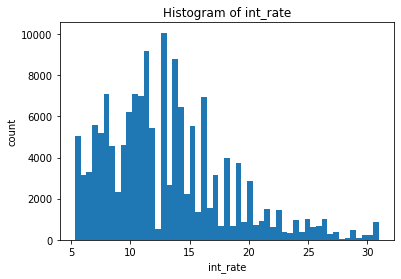

In [ ]:
# Feature 1 int_rate

# Histogram (For Univariate Visualization)
from matplotlib import pyplot as plt
import pandas as pd

# Import DataFrame
df = pd.read_csv('http://www.ishelp.info/data/lc_large_no_missing.csv')

# Create Histogram
plt.hist(df.int_rate, bins=int(round(df.int_rate.count()**(1/3), 0)))
plt.title('Histogram of int_rate')
plt.xlabel('int_rate')
plt.ylabel('count')

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F1_int_rate.png")
# files.download("F1_int_rate.png") 

# Show it
plt.show()


y  = -0.05x + 5.51
t  = 594.56
p  = 0.0


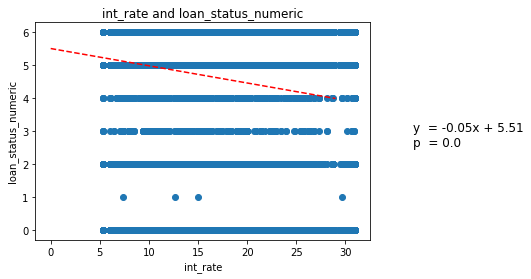

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


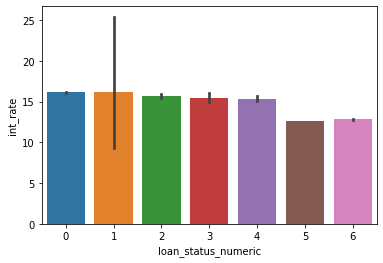

In [ ]:
# Feature 1 Data Exploration Report

from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Create Scatterplot
plt.scatter(df.int_rate, df.loan_status_numeric)
plt.title('int_rate and loan_status_numeric')
plt.xlabel('int_rate')
plt.ylabel('loan_status_numeric')

# Create a regression line
m, b, r, p, err = stats.linregress(df.int_rate, df.loan_status_numeric)
num = int(df.int_rate.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")

# Add regression equation components to plot
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.45, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Calculate T-Stat and P Value
t, p= stats.ttest_ind(df.int_rate, df.loan_status_numeric)

# Print elements of linear regression equation
print('y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)))
print('t  = ' + str(round(t, 2)))
print('p  = ' + str(round(p, 8)))

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F1_int_rate_and_loan_status_numeric.png")
# files.download("F1_int_rate_and_loan_status_numeric.png") 

# Show it
plt.show()

# Create a barchart
sns.barplot(df['loan_status_numeric'], df['int_rate']);



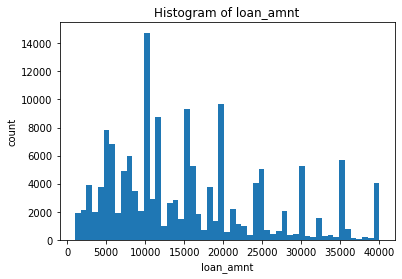

In [ ]:
# Feature 2 loan_amount

# Histogram (For Univariate Visualization)
from matplotlib import pyplot as plt
import pandas as pd

# Import DataFrame
df = pd.read_csv('http://www.ishelp.info/data/lc_large_no_missing.csv')

# Create Histogram
plt.hist(df.loan_amnt, bins=int(round(df.loan_amnt.count()**(1/3), 0)))
plt.title('Histogram of loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('count')

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F2_loan_amount.png")
# files.download("F2_loan_amount.png") 

# Show it
plt.show()


y  = -0.0x + 4.92
t  = 617.26
p  = 0.0


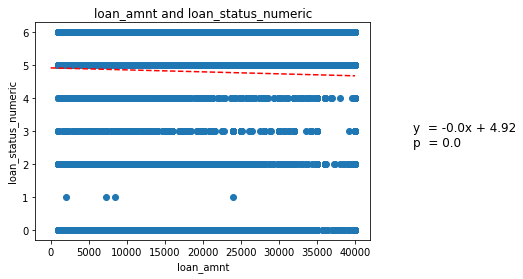

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


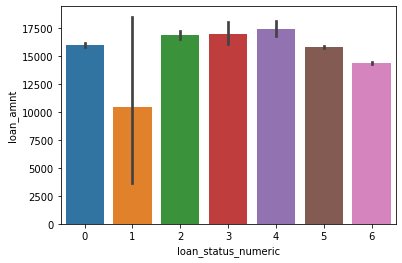

In [ ]:
# Feature 2 Data Exploration Report

from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Create Scatterplot
plt.scatter(df.loan_amnt, df.loan_status_numeric)
plt.title('loan_amnt and loan_status_numeric')
plt.xlabel('loan_amnt')
plt.ylabel('loan_status_numeric')

# Create a regression line
m, b, r, p, err = stats.linregress(df.loan_amnt, df.loan_status_numeric)
num = int(df.loan_amnt.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")

# Add regression equation components to plot
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.45, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Calculate T-Stat and P Value
t, p= stats.ttest_ind(df.loan_amnt, df.loan_status_numeric)

# Print elements of linear regression equation
print('y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)))
print('t  = ' + str(round(t, 2)))
print('p  = ' + str(round(p, 8)))

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F2_loan_amnt_and_loan_status_numeric.png")
# files.download("F2_loan_amnt_and_loan_status_numeric.png") 

# Show it
plt.show()

# Create a barchart
sns.barplot(df['loan_status_numeric'], df['loan_amnt']);


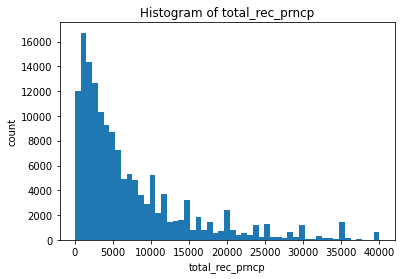

In [ ]:
# Feature 3 total_rec_prncp

# Histogram (For Univariate Visualization)
from matplotlib import pyplot as plt
import pandas as pd

# Import DataFrame
df = pd.read_csv('http://www.ishelp.info/data/lc_large_no_missing.csv')

# Create Histogram
plt.hist(df.total_rec_prncp, bins=int(round(df.total_rec_prncp.count()**(1/3), 0)))
plt.title('Histogram of total_rec_prncp')
plt.xlabel('total_rec_prncp')
plt.ylabel('count')

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F3_total_rec_prncp.png")
# files.download("F3_total_rec_prncp.png") 

# Show it
plt.show()


y  = 0.0x + 4.39
t  = 369.9
p  = 0.0


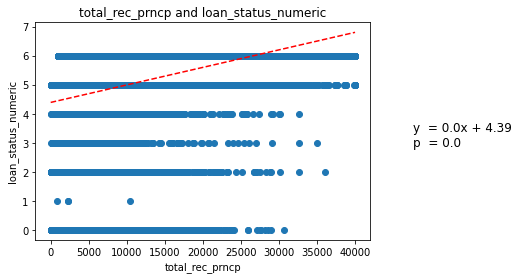

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


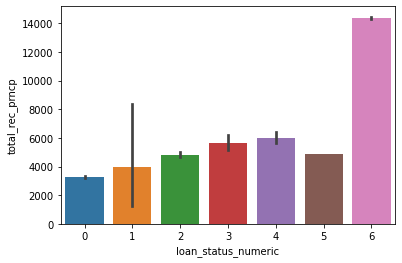

In [ ]:
# Feature 3 Data Exploration Report

from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Create Scatterplot
plt.scatter(df.total_rec_prncp, df.loan_status_numeric)
plt.title('total_rec_prncp and loan_status_numeric')
plt.xlabel('total_rec_prncp')
plt.ylabel('loan_status_numeric')

# Create a regression line
m, b, r, p, err = stats.linregress(df.total_rec_prncp, df.loan_status_numeric)
num = int(df.total_rec_prncp.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")

# Add regression equation components to plot
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.45, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Calculate T-Stat and P Value
t, p= stats.ttest_ind(df.total_rec_prncp, df.loan_status_numeric)

# Print elements of linear regression equation
print('y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)))
print('t  = ' + str(round(t, 2)))
print('p  = ' + str(round(p, 8)))

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F3_total_rec_prncp_and_loan_status_numeric.png")
# files.download("F3_total_rec_prncp_and_loan_status_numeric.png") 

# Show it
plt.show()

# Create a barchart
sns.barplot(df['loan_status_numeric'], df['total_rec_prncp']);


In [ ]:
#Feature 4
#Effect Size/P-value for annual_inc/loan_status_numeric

import pandas as pd
import numpy as np
from scipy import stats

col = 'annual_inc'
label = 'loan_status_numeric'

groups = df[col].unique()              
df_grouped = df.groupby(col)           
group_labels = []                      
for g in groups:                  
  g_list = df_grouped.get_group(g)    
  group_labels.append(g_list[label])  

oneway = stats.f_oneway(*group_labels) 
f = oneway[0]
p = oneway[1]
print("F: " + str(round(f, 3)))
print("p: " + str(round(p, 3))) 

F: 1.056
p: 0.0


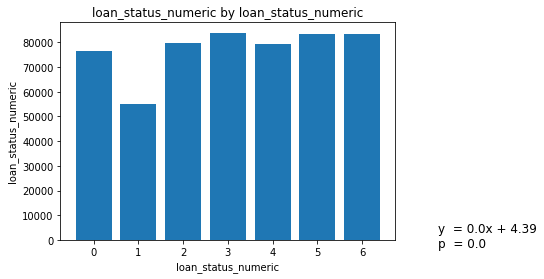

In [ ]:
#Feature 4
#Visual for annual_inc
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

means = df.groupby('loan_status_numeric').mean()['annual_inc'].round(2)

plt.bar(df.groupby('loan_status_numeric').groups.keys(), means)
plt.title(label + " by " + 'loan_status_numeric')
plt.xlabel('loan_status_numeric')
plt.ylabel(label)


groups = df['loan_status_numeric'].unique()
df_grouped = df.groupby('loan_status_numeric')
group_labels = []
for g in groups:
  g_list = df_grouped.get_group(g)
  group_labels.append(g_list['annual_inc'])

oneway = stats.f_oneway(*group_labels)

unique_groups = df['loan_status_numeric'].unique()
ttests = []

for i, group in enumerate(unique_groups):
  for i2, group_2 in enumerate(unique_groups):
    if i2 > i:
      type_1 = df[df['loan_status_numeric'] == group]
      type_2 = df[df['loan_status_numeric'] == group_2]
      t, p = stats.ttest_ind(type_1[label], type_2['annual_inc'])
      ttests.append([group, group_2, t.round(4), p.round(4)])

plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

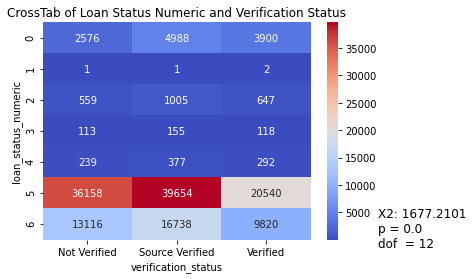

In [ ]:
#Feature 5
#Heatmap of Verification Status with built in effect size/P-value

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2

crosstab = pd.crosstab(df['loan_status_numeric'], df['verification_status'])
X, p, dof, contingency_table = chi2_contingency(crosstab)

textstr  = 'X2: ' + str(round(X, 4))+ '\n'
textstr += 'p = ' + str(round(p, 4)) + '\n'
textstr += 'dof  = ' + str(dof)
plt.text(0.9, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)


plt.title('CrossTab of Loan Status Numeric and Verification Status')
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm');

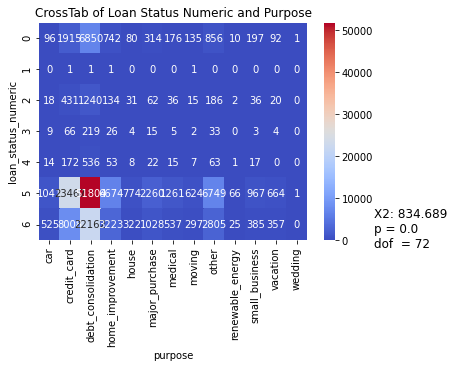

In [ ]:
#Feature 6
#Heatmap of Purpose with built in effect size/P-value

crosstab = pd.crosstab(df['loan_status_numeric'], df['purpose'])
X, p, dof, contingency_table = chi2_contingency(crosstab)

textstr  = 'X2: ' + str(round(X, 4))+ '\n'
textstr += 'p = ' + str(round(p, 4)) + '\n'
textstr += 'dof  = ' + str(dof)
plt.text(0.9, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)


plt.title('CrossTab of Loan Status Numeric and Purpose')
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm');

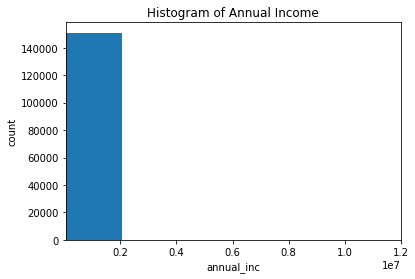

In [ ]:
#Histogram for Annual Income

from matplotlib import pyplot as plt
import pandas as pd


plt.hist(df.annual_inc, bins=int(round(df.annual_inc.count()**(1/3), 0)))
plt.title('Histogram of Annual Income')
plt.xlabel('annual_inc')
plt.ylabel('count')
plt.xlim(60000, 12000000)

plt.show()

X: 600.515


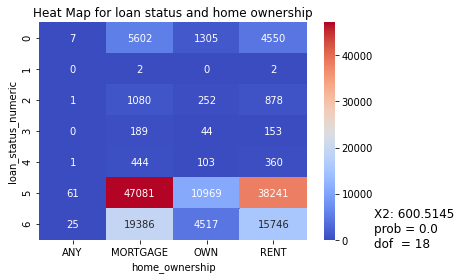

In [ ]:
#Feature 7 

#Bivariate Home Ownership
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
crosstab = pd.crosstab(df['loan_status_numeric'], df['home_ownership'])
X, prob, dof, contingency_table = chi2_contingency(crosstab)
textstr  = 'X2: ' + str(round(X, 4))+ '\n'
textstr += 'prob = ' + str(round(p, 4)) + '\n'
textstr += 'dof  = ' + str(dof)
plt.text(0.9, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
ct_df = pd.DataFrame(np.rint(contingency_table).astype('int64'), columns=crosstab.columns, index=crosstab.index)
plt.title('Heat Map for loan status and home ownership')
sns.heatmap(ct_df, annot=True, fmt='d', cmap='coolwarm')

print("X: " + str(round(X, 3)))

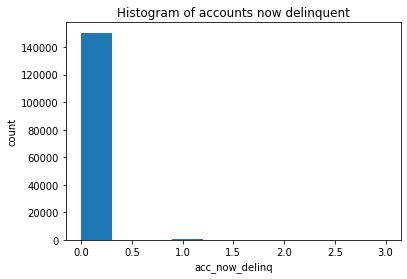

In [ ]:
#Feature 8

#Univariate on Accounts now delinq
from matplotlib import pyplot as plt
import pandas as pd

plt.hist(df.acc_now_delinq)
plt.title('Histogram of accounts now delinquent')
plt.xlabel('acc_now_delinq')
plt.ylabel('count')

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F8_acc_now_delinq.png")
# files.download("F8_acc_now_delinq.png") 

# Show it
plt.show()


y  = -0.21x + 4.83
t  = -1240.44
p  = 0.0


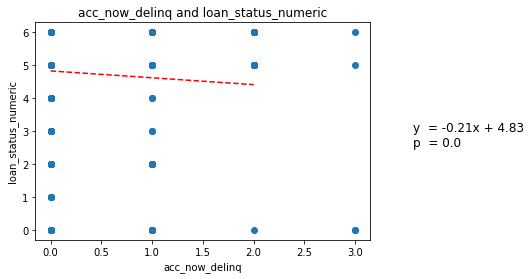

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


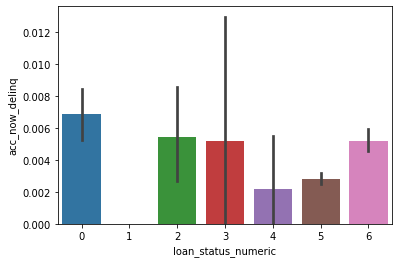

In [ ]:
#Feature 8 
#Bivariate acc_now_delinq
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Create Scatterplot
plt.scatter(df.acc_now_delinq, df.loan_status_numeric)
plt.title('acc_now_delinq and loan_status_numeric')
plt.xlabel('acc_now_delinq')
plt.ylabel('loan_status_numeric')

# Create a regression line
m, b, r, p, err = stats.linregress(df.acc_now_delinq, df.loan_status_numeric)
num = int(df.acc_now_delinq.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")

# Add regression equation components to plot
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.45, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Calculate T-Stat and P Value
t, p= stats.ttest_ind(df.acc_now_delinq, df.loan_status_numeric)

# Print elements of linear regression equation
print('y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)))
print('t  = ' + str(round(t, 2)))
print('p  = ' + str(round(p, 8)))

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F8_acc_now_delinq_and_loan_status_numeric.png")
# files.download("F8_acc_now_delinq_and_loan_status_numeric.png") 

# Show it
plt.show()

sns.barplot(df['loan_status_numeric'], df['acc_now_delinq']);



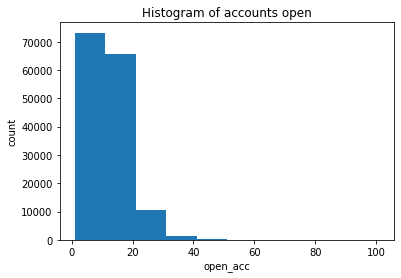

In [ ]:
#Feature 9 
#Univariate Open Account
from matplotlib import pyplot as plt
import pandas as pd

plt.hist(df.open_acc)
plt.title('Histogram of accounts open')
plt.xlabel('open_acc')
plt.ylabel('count')

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F9_open_acc.png")
# files.download("F8_open_acc.png") 

# Show it
plt.show()


y  = -0.0x + 4.86
t  = 445.46
p  = 0.0


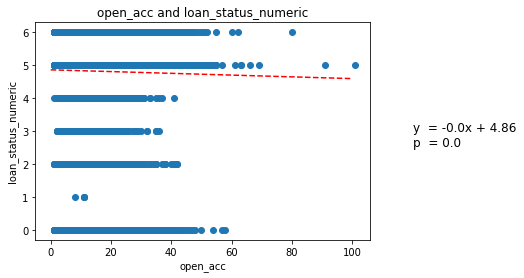

In [ ]:
# Feature 9 
# Bivariate Open Accounts and Loan Status Numeric
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Create Scatterplot
plt.scatter(df.open_acc, df.loan_status_numeric)
plt.title('open_acc and loan_status_numeric')
plt.xlabel('open_acc')
plt.ylabel('loan_status_numeric')

# Create a regression line
m, b, r, p, err = stats.linregress(df.open_acc, df.loan_status_numeric)
num = int(df.open_acc.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")

# Add regression equation components to plot
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.45, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Calculate T-Stat and P Value
t, p= stats.ttest_ind(df.open_acc, df.loan_status_numeric)

# Print elements of linear regression equation
print('y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)))
print('t  = ' + str(round(t, 2)))
print('p  = ' + str(round(p, 8)))

# Save it (comment it so it doesn't run everytime the code does)
# from google.colab import files
# plt.savefig("F9_open_acc_and_loan_status_numeric.png")
# files.download("F9_open_acc_and_loan_status_numeric.png") 

# Show it
plt.show()


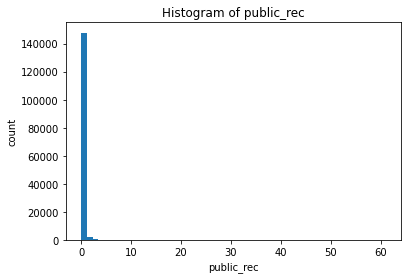

In [ ]:
#Feature 10: Public_rec

# Histogram (For Univariate Visualization)
from matplotlib import pyplot as plt
import pandas as pd

# Import DataFrame
df = pd.read_csv('http://www.ishelp.info/data/lc_large_no_missing.csv')

# Create Histogram
plt.hist(df.pub_rec, bins=int(round(df.pub_rec.count()**(1/3), 0)))
plt.title('Histogram of public_rec')
plt.xlabel('public_rec')
plt.ylabel('count')

# Show it
plt.show()

y  = -0.07x + 4.84
t  = -1112.85
p  = 0.0


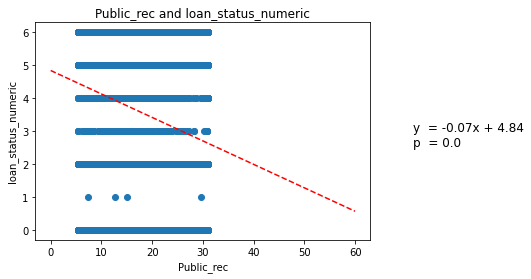

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


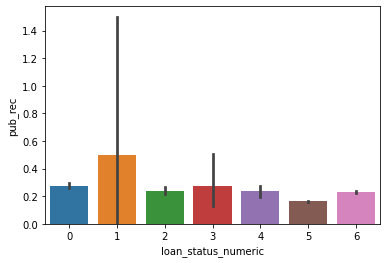

In [ ]:
# Feature 10: Public_rec: Data Exploration Report:

from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Create Scatterplot
plt.scatter(df.int_rate, df.loan_status_numeric)
plt.title('Public_rec and loan_status_numeric')
plt.xlabel('Public_rec')
plt.ylabel('loan_status_numeric')

# Create a regression line
m, b, r, p, err = stats.linregress(df.pub_rec, df.loan_status_numeric)
num = int(df.pub_rec.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")

# Add regression equation components to plot
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.45, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Calculate T-Stat and P Value
t, p= stats.ttest_ind(df.pub_rec, df.loan_status_numeric)

# Print elements of linear regression equation
print('y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)))
print('t  = ' + str(round(t, 2)))
print('p  = ' + str(round(p, 8)))

# Show it
plt.show()

# Create a barchart
sns.barplot(df['loan_status_numeric'], df['pub_rec']);

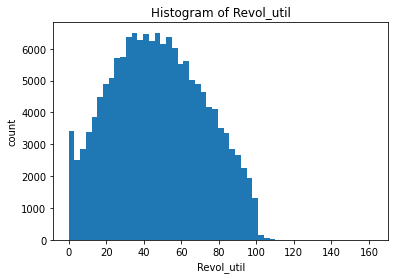

In [ ]:
#Feature 11: Revol_util

# Histogram (For Univariate Visualization)
from matplotlib import pyplot as plt
import pandas as pd

# Import DataFrame
df = pd.read_csv('http://www.ishelp.info/data/lc_large_no_missing.csv')

# Create Histogram
plt.hist(df.revol_util, bins=int(round(df.revol_util.count()**(1/3), 0)))
plt.title('Histogram of Revol_util')
plt.xlabel('Revol_util')
plt.ylabel('count')

# Show it
plt.show()

y  = -0.05x + 5.51
t  = 669.04
p  = 0.0


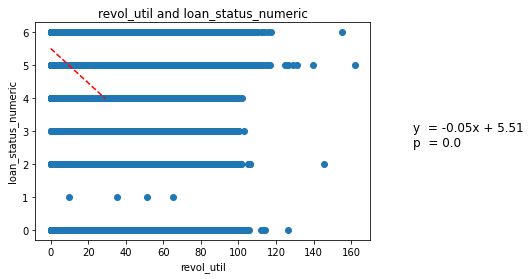

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


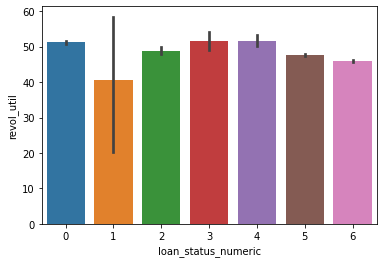

In [ ]:
# Feature 11 : Revol_util: Data Exploration Report

from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Create Scatterplot
plt.scatter(df.revol_util, df.loan_status_numeric)
plt.title('revol_util and loan_status_numeric')
plt.xlabel('revol_util')
plt.ylabel('loan_status_numeric')

# Create a regression line
m, b, r, p, err = stats.linregress(df.int_rate, df.loan_status_numeric)
num = int(df.int_rate.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")

# Add regression equation components to plot
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.45, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Calculate T-Stat and P Value
t, p= stats.ttest_ind(df.revol_util, df.loan_status_numeric)

# Print elements of linear regression equation
print('y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)))
print('t  = ' + str(round(t, 2)))
print('p  = ' + str(round(p, 8)))

# Show it
plt.show()

# Create a barchart
sns.barplot(df['loan_status_numeric'], df['revol_util']);

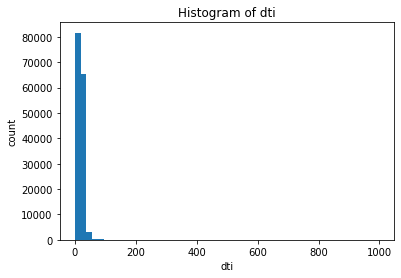

In [ ]:
#Feature 12: dti:

# Histogram (For Univariate Visualization)
from matplotlib import pyplot as plt
import pandas as pd

# Import DataFrame
df = pd.read_csv('http://www.ishelp.info/data/lc_large_no_missing.csv')

# Create Histogram
plt.hist(df.dti, bins=int(round(df.dti.count()**(1/3), 0)))
plt.title('Histogram of dti')
plt.xlabel('dti')
plt.ylabel('count')

# Show it
plt.show()

y  = -0.0x + 4.92
t  = 437.19
p  = 0.0


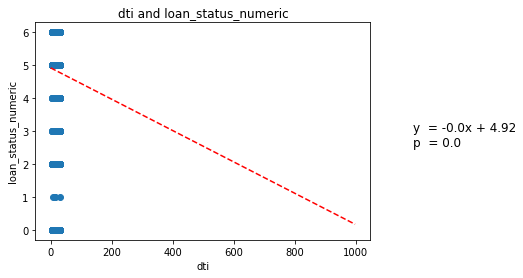

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


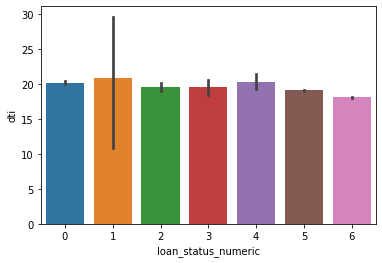

In [ ]:
# Feature 12: dti: Data Exploration Report:

from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Create Scatterplot
plt.scatter(df.int_rate, df.loan_status_numeric)
plt.title('dti and loan_status_numeric')
plt.xlabel('dti')
plt.ylabel('loan_status_numeric')

# Create a regression line
m, b, r, p, err = stats.linregress(df.dti, df.loan_status_numeric)
num = int(df.dti.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")

# Add regression equation components to plot
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.45, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Calculate T-Stat and P Value
t, p= stats.ttest_ind(df.dti, df.loan_status_numeric)

# Print elements of linear regression equation
print('y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)))
print('t  = ' + str(round(t, 2)))
print('p  = ' + str(round(p, 8)))

# Show it
plt.show()

# Create a barchart
sns.barplot(df['loan_status_numeric'], df['dti']);